# Clustering 

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

## Types of clustering algorithms:-

- **Connectivity models:** As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.

- **Centroid models:** These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

- **Distribution models:** These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

- **Density Models:** These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.


## 4. K Means Clustering: - 


K means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in these 5 steps :

1. Specify the desired number of clusters K : Let us choose k=2 for these 5 data points in 2-D space.

![CLustering](./picture/clustering_1.png)

2. Randomly assign each data point to a cluster : Let’s assign three points in cluster 1 shown using red color and two points in cluster 2 shown using grey color.

![clustering](./picture/clustering_2.png)

3. Compute cluster centroids : The centroid of data points in the red cluster is shown using red cross and those in grey cluster using grey cross.

![clustering](./picture/clustering_3.png)

4. Re-assign each point to the closest cluster centroid : Note that only the data point at the bottom is assigned to the red cluster even though its closer to the centroid of grey cluster. Thus, we assign that data point into grey cluster.

![clustering](./picture/clustering_4.png)

5. Re-compute cluster centroids : Now, re-computing the centroids for both the clusters.

![clustering](./picture/clustering_5.png)

6. Repeat steps 4 and 5 until no improvements are possible : Similarly, we’ll repeat the 4th and 5th steps until we’ll reach global optima. When there will be no further switching of data points between two clusters for two successive repeats. It will mark the termination of the algorithm if not explicitly mentioned.


##  Hierarchical Clustering:- 

Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

The results of hierarchical clustering can be shown using dendrogram. The dendrogram can be interpreted as:

![clustering](./picture/clustering_6.png)

At the bottom, we start with 25 data points, each assigned to separate clusters. Two closest clusters are then merged till we have just one cluster at the top. The height in the dendrogram at which two clusters are merged represents the distance between two clusters in the data space.

The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

In the above example, the best choice of no. of clusters will be 4 as the red horizontal line in the dendrogram below covers maximum vertical distance AB.

![clustering](./picture/clustering_7.png)


Two important things that you should know about hierarchical clustering are:

- This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.

- The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters :

> Euclidean distance: $||a-b||_2 = √(Σ(a_i-b_i))$

> Squared Euclidean distance: $||a-b||_2^2 = Σ((a_i-b_i)^2)$

> Manhattan distance: $||a-b||_1 = Σ|a_i-b_i|$

> Maximum distance:$||a-b||_{INFINITY} = max_i|a_i-b_i|$

> Mahalanobis distance: $√((a-b)^T S^{-1} (-b))   {where, s : covariance matrix}$



## K-Means using "SKLearn" library

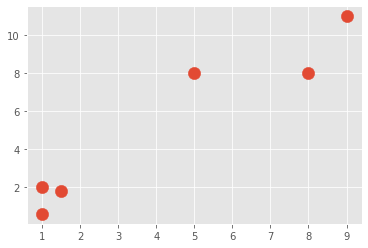

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np 
from sklearn.cluster import KMeans

x = np.array([[1,2],
              [1.5, 1.8],
              [5,8],
              [8,8],
              [1,0.6],
              [9,11]])

plt.scatter(x[:, 0] , x[:, 1] , s = 150)
plt.show()

In [5]:
clf = KMeans( n_clusters = 2)
clf.fit(x)

KMeans(n_clusters=2)

In [6]:
centroid = clf.cluster_centers_
labels = clf.labels_

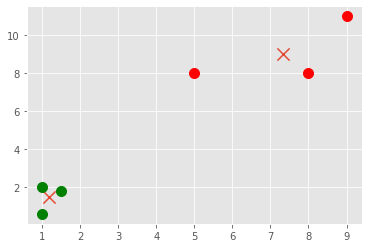

In [14]:
colors = ['g.' , 'r.', 'c.' , 'b.', 'k.','o.']

for i in range(len(x)):
    plt.plot(x[i][0] , x[i][1] , colors[labels[i]] , markersize = 20)

plt.scatter(centroid[:,0] , centroid[:, 1], marker='x' , s = 150, linewidths=5)
plt.show()

In [21]:
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')
import numpy as np 
from sklearn.cluster import KMeans
from sklearn import preprocessing ,  model_selection
import pandas as pd 

df = pd.read_csv("./dataset/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.drop(['PassengerId' , 'Name'] , 1 , inplace =True)
df.fillna(0 , inplace = True)

**Handling of Non-Numeric data**

In [50]:
def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}

        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype == np.object:
            columns_contents = df[column].values.tolist()
            unique_elements = set(columns_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1

            df[column] = list(map(convert_to_int , df[column]))

    return df

df = handle_non_numerical_data(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,452,7.2500,0,1
1,1,1,1,38.0,1,0,375,71.2833,23,3
2,1,3,1,26.0,0,0,395,7.9250,0,1
3,1,1,1,35.0,1,0,475,53.1000,104,1
4,0,3,0,35.0,0,0,274,8.0500,0,1


In [51]:
x = np.array(df.drop(['Survived'] , 1).astype('float'))
y = np.array(df['Survived'])

In [52]:
clf =  KMeans(n_clusters = 2)
clf.fit(x)

KMeans(n_clusters=2)

In [57]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1 , len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct / len(x))

0.44219977553310885
